In [3]:
from accelerate import init_empty_weights
from transformers import GPT2Tokenizer, GPT2Config, GPT2Model

from accelerate import init_empty_weights
from transformers import AutoConfig, AutoModelForCausalLM
from accelerate import load_checkpoint_and_dispatch

from accelerate import infer_auto_device_map, init_empty_weights
from transformers import AutoConfig, AutoModelForCausalLM

In [14]:
checkpoint = 'gpt2'
dtype = 'float32'

config = GPT2Config.from_pretrained(checkpoint)
with init_empty_weights():
    model = GPT2Model(config)

model.tie_weights()
device_map = infer_auto_device_map(model, no_split_module_classes=["GPT2Block"], dtype=dtype)


In [15]:
GPT2Model.from_pretrained

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

In [16]:
device_map

{'': 0}

In [1]:

image_processor = AutoImageProcessor.from_pretrained("openai/imagegpt-small")

device_map = infer_auto_device_map(model, no_split_module_classes=["GPT2Block"])
model = ImageGPTForCausalImageModeling.from_pretrained("openai/imagegpt-small", device_map = device_map)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



/home/aizdebski/micromamba/envs/hybrid-transformer/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


NameError: name 'model' is not defined

In [31]:

accelerator = Accelerator(distributed_type=True)
device = accelerator.device
model.to(device)

TypeError: Accelerator.__init__() got an unexpected keyword argument 'distributed_type'

In [30]:
accelerator.distributed_type

<DistributedType.NO: 'NO'>

In [2]:
from accelerate import notebook_launcher



args = ("fp16", 42, 64)
notebook_launcher(training_loop, args, num_processes=2)



/home/aizdebski/micromamba/envs/hybrid-transformer/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Launching training on 2 GPUs.


RuntimeError: An issue was found when launching the training: 

-- Process 0 terminated with the following error:
Traceback (most recent call last):
  File "/home/aizdebski/micromamba/envs/hybrid-transformer/lib/python3.11/site-packages/torch/multiprocessing/spawn.py", line 74, in _wrap
    fn(i, *args)
  File "/home/aizdebski/micromamba/envs/hybrid-transformer/lib/python3.11/site-packages/accelerate/utils/launch.py", line 562, in __call__
    self.launcher(*args)
TypeError: training_loop() takes 1 positional argument but 3 were given


In [1]:
def training_loop(model):
    accelerator = Accelerator(num_processes=4)
    model.to(device)

In [1]:
import torch

torch.cuda.is_available()

True

In [2]:
torch.cuda.device_count()

4

In [3]:
t = torch.cuda.get_device_properties(0).total_memory
r = torch.cuda.memory_reserved(0)
a = torch.cuda.memory_allocated(0)
f = r-a  # free inside reserved

In [4]:
f

0

In [5]:
t = torch.cuda.get_device_properties(1).total_memory
r = torch.cuda.memory_reserved(1)
a = torch.cuda.memory_allocated(1)
f = r-a  # free inside reserved

In [6]:
f

0

In [7]:
import torch

In [8]:
torch.cuda.is_available()

True

In [9]:
torch.cuda.device_count()

4

In [11]:
torch.cuda.current_device()

0

In [12]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 2080 Ti'

In [13]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 2080 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [14]:
torch.cuda.mem_get_info()

(1027211264, 11546394624)

In [2]:
import pynvml

def get_free_memory(gpu_index):
    pynvml.nvmlInit()
    handle = pynvml.nvmlDeviceGetHandleByIndex(int(gpu_index))
    mem_info = pynvml.nvmlDeviceGetMemoryInfo(handle)
    print('Memory Usage:')
    print(f"Free: {mem_info.free // 1024 ** 3 } gb")
    return None


In [3]:
get_free_memory(2)

Memory Usage:
Free: 7 gb


In [1]:
import torch

device = torch.device("cuda:2")

In [16]:
from transformers import GPT2Tokenizer, GPT2Model

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)


/home/aizdebski/micromamba/envs/hybrid-transformer/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
output

BaseModelOutputWithPastAndCrossAttentions(last_hidden_state=tensor([[[ 0.1629, -0.2166, -0.1410,  ..., -0.2619, -0.0819,  0.0092],
         [ 0.4628,  0.0248, -0.0785,  ..., -0.0859,  0.5122, -0.3939],
         [-0.0644,  0.1551, -0.6306,  ...,  0.2488,  0.3691,  0.0833],
         ...,
         [-0.5591, -0.4490, -1.4540,  ...,  0.1650, -0.1302, -0.3740],
         [ 0.1400, -0.3875, -0.7916,  ..., -0.1780,  0.1824,  0.2185],
         [ 0.1721, -0.2420, -0.1124,  ..., -0.1068,  0.1205, -0.3213]]],
       grad_fn=<ViewBackward0>), past_key_values=((tensor([[[[-1.0719,  2.4170,  0.9660,  ..., -0.4787, -0.3316,  1.7925],
          [-2.2897,  2.5424,  0.8317,  ..., -0.5299, -2.4828,  1.3537],
          [-2.2856,  2.7125,  2.4725,  ..., -1.4911, -1.8427,  1.6493],
          ...,
          [-3.3203,  2.3325,  2.7061,  ..., -1.1569, -1.5586,  2.4076],
          [-2.9917,  2.2701,  2.1742,  ..., -0.8670, -1.6410,  1.9237],
          [-2.5066,  2.6139,  2.1347,  ..., -0.0627, -2.0542,  1.6568]],

In [7]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

torch_device = "cuda:0" if torch.cuda.is_available() else "cpu"

tokenizer = AutoTokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = AutoModelForCausalLM.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id, device_map='auto').to(torch_device)


In [8]:
model.device

device(type='cuda', index=0)

In [10]:
from transformers import ImageGPTFeatureExtractor, ImageGPTForCausalImageModeling
import numpy as np
import torch

feature_extractor = ImageGPTFeatureExtractor.from_pretrained('openai/imagegpt-medium')
model = ImageGPTForCausalImageModeling.from_pretrained('openai/imagegpt-medium')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

/home/aizdebski/micromamba/envs/hybrid-transformer/lib/python3.11/site-packages/transformers/models/imagegpt/feature_extraction_imagegpt.py:28: FutureWarning: The class ImageGPTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ImageGPTImageProcessor instead.
  warnings.warn(


ImageGPTForCausalImageModeling(
  (transformer): ImageGPTModel(
    (wte): Embedding(513, 1024)
    (wpe): Embedding(1024, 1024)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-35): 36 x ImageGPTBlock(
        (ln_1): ImageGPTLayerNorm()
        (attn): ImageGPTAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): ImageGPTLayerNorm()
        (mlp): ImageGPTMLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): QuickGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): ImageGPTLayerNorm()
  )
  (lm_head): Linear(in_features=1024, out_features=512, bias=False)
)

In [12]:
batch_size = 8
context = torch.full((batch_size, 1), model.config.vocab_size - 1) #initialize with SOS token (with ID 512)
context = torch.tensor(context).to(device)
output = model.generate(input_ids=context, max_length=model.config.n_positions + 1, temperature=1.0, do_sample=True)

/tmp/ipykernel_1153052/2127122845.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  context = torch.tensor(context).to(device)
This is a friendly reminder - the current text generation call will exceed the model's predefined maximum length (1024). Depending on the model, you may observe exceptions, performance degradation, or nothing at all.


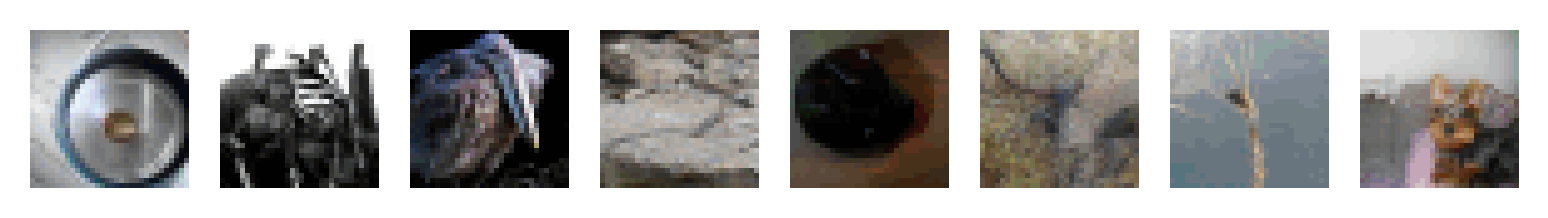

In [13]:
#visualize samples with Image-GPT color palette.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

clusters = feature_extractor.clusters
n_px = feature_extractor.size

samples = output[:,1:].cpu().detach().numpy()
samples_img = [np.reshape(np.rint(127.5 * (clusters[s] + 1.0)), [32, 32, 3]).astype(np.uint8) for s in samples] # convert color cluster tokens back to pixels
f, axes = plt.subplots(1, batch_size, dpi=300)

for img, ax in zip(samples_img, axes):
    ax.axis('off')
    ax.imshow(img)

In [14]:
from datasets import load_dataset

# load cifar10 (only small portion for demonstration purposes) 
train_ds, test_ds = load_dataset('cifar10', split=['train[:5000]', 'test[:2000]'])
# split up training into training + validation
splits = train_ds.train_test_split(test_size=0.1)
train_ds = splits['train']
val_ds = splits['test']

Generating train split:   0%|                  | 0/50000 [00:00<?, ? examples/s]/home/aizdebski/micromamba/envs/hybrid-transformer/lib/python3.11/site-packages/datasets/features/image.py:332: UserWarning: Downcasting array dtype uint8 to uint8 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")
Generating test split: 100%|█████| 10000/10000 [00:02<00:00, 4034.92 examples/s]


NotImplementedError: Loading a dataset cached in a LocalFileSystem is not supported.

In [16]:
import torchvision

In [20]:
dataset = torchvision.datasets.CIFAR10(root='datasets/cifar10/', download=True)

100%|███████████████████████| 170498071/170498071 [00:06<00:00, 26570299.32it/s]


Extracting datasets/cifar10/cifar-10-python.tar.gz to datasets/cifar10/


In [21]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=32x32>, 6)

In [8]:
from datasets import load_dataset

dataset = load_dataset("cifar10")

In [9]:
image = dataset['train'][0]

In [11]:
import matplotlib.pyplot as plt

plt.imshow(image['img'].permute(1, 2, 0))

AttributeError: permute

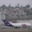

In [12]:
image['img']

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
This is a friendly reminder - the current text generation call will exceed the model's predefined maximum length (1024). Depending on the model, you may observe exceptions, performance degradation, or nothing at all.


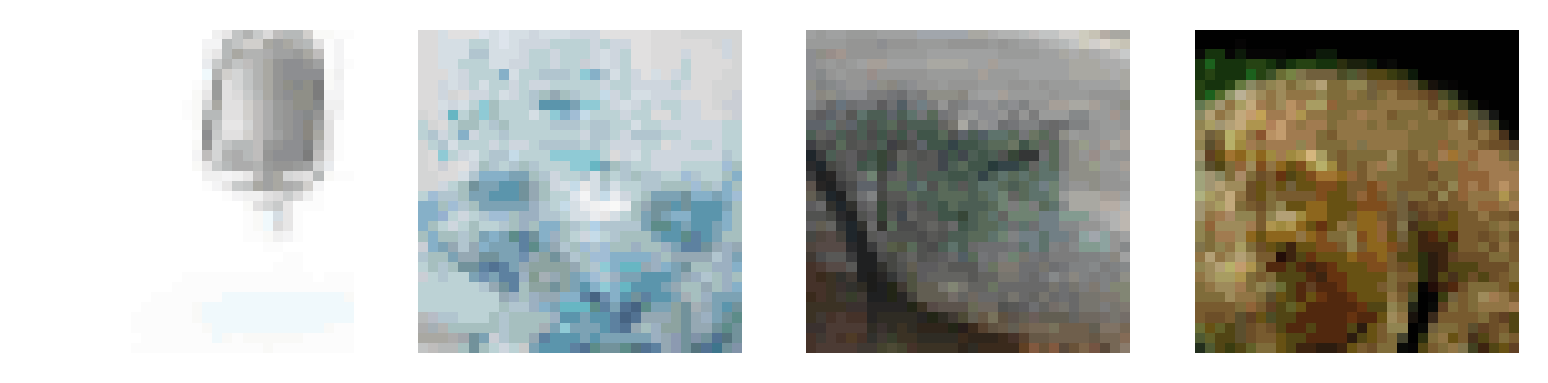

In [63]:
from transformers import AutoImageProcessor, ImageGPTForCausalImageModeling
import torch
import matplotlib.pyplot as plt
import numpy as np

image_processor = AutoImageProcessor.from_pretrained("openai/imagegpt-small")
model = ImageGPTForCausalImageModeling.from_pretrained("openai/imagegpt-small")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# unconditional generation of 8 images
batch_size = 4
context = torch.full((batch_size, 1), model.config.vocab_size - 1)  # initialize with SOS token
context = context.to(device)
output = model.generate(
    input_ids=context, max_length=model.config.n_positions + 1, temperature=1.0, do_sample=True, top_k=40
)

clusters = image_processor.clusters
height = image_processor.size["height"]
width = image_processor.size["width"]

samples = output[:, 1:].cpu().detach().numpy()
samples_img = [
    np.reshape(np.rint(127.5 * (clusters[s] + 1.0)), [height, width, 3]).astype(np.uint8) for s in samples
]  # convert color cluster tokens back to pixels
f, axes = plt.subplots(1, batch_size, dpi=300)

for img, ax in zip(samples_img, axes):
    ax.axis("off")
    ax.imshow(img)

In [67]:
samples_img[0].shape

(32, 32, 3)

In [ ]:
from transformers import AutoImageProcessor, ImageGPTForImageClassification
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_processor = AutoImageProcessor.from_pretrained("openai/imagegpt-small")
model = ImageGPTForImageClassification.from_pretrained("openai/imagegpt-small")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

In [6]:
image_processor

ImageGPTImageProcessor {
  "clusters": [
    [
      0.8866443634033203,
      0.6618829369544983,
      0.3891746401786804
    ],
    [
      -0.6042559146881104,
      -0.02295008860528469,
      0.5423797369003296
    ],
    [
      0.12942790985107422,
      0.03570118546485901,
      -0.3643915355205536
    ],
    [
      -0.3553103804588318,
      -0.15857496857643127,
      -0.664303183555603
    ],
    [
      0.7844981551170349,
      -0.2559399902820587,
      -0.7189618945121765
    ],
    [
      0.1935412883758545,
      0.23239648342132568,
      0.08234082162380219
    ],
    [
      -0.9012048840522766,
      -0.7926875352859497,
      -0.9216221570968628
    ],
    [
      -0.013770446181297302,
      -0.8677454590797424,
      -0.8910260796546936
    ],
    [
      -0.8732763528823853,
      -0.5560516715049744,
      -0.686274528503418
    ],
    [
      -0.3679597079753876,
      -0.4616401493549347,
      -0.8443512916564941
    ],
    [
      -0.17434515058994293,

In [13]:
inputs = image_processor(images=image['img'], return_tensors="pt")

In [15]:
inputs

{'input_ids': tensor([[226, 226, 226,  ..., 369, 369, 369]])}

In [21]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='data/', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='data/', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [51]:
from hybrid_transformer.evaluation.inception import InceptionV3
import torch
import numpy as np
import tqdm as tqdm

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
DIMS = 2048


def load_fid_score_model(device: torch.device) -> torch.nn.Module:
    block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[DIMS]
    model = InceptionV3([block_idx]).to(device)
    model = model.to(device)
    model.eval()
    return lambda batch: model(batch)[0]

@torch.no_grad()
def calculate_test_distribution(loader, device):
    
    score_model = load_fid_score_model(device)    
    
    distribution = []
    
    for idx, batch in enumerate(loader):
        x, y = batch
        distribution.append(score_model(x.to(device)).cpu().detach().numpy())
        if idx > 10:
            break
            
    distribution_orig = np.array(np.concatenate(distribution)).reshape(-1, DIMS)
    
    return distribution_orig


@torch.no_grad()
def calculate_model_distribution(image_processor, model, batch_size, num_images_to_generate, device):
    
    context = torch.full((batch_size, 1), model.config.vocab_size - 1)
    context = context.to(device)
    output = model.generate(
        input_ids=context, max_length=model.config.n_positions + 1, temperature=1.0, do_sample=True, top_k=40
    )

    clusters = image_processor.clusters
    height = image_processor.size["height"]
    width = image_processor.size["width"]
    
    samples = output[:, 1:].cpu().detach().numpy()
    samples_img = [
        np.reshape(np.rint(127.5 * (clusters[s] + 1.0)), [height, width, 3]).astype(np.uint8) for s in samples
    ]  # convert color cluster tokens back to pixels
            
    return samples_img


In [62]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_distribution = calculate_test_distribution(testloader, device)
generated_distribution = calculate_test_distribution(image_processor=image_processor, model=model, batch_size=2, num_images_to_generate=2, device=device)

NameError: name 'image_processor' is not defined

In [0]:



examples, _ = train_loop.generate_examples(total_num_exapmles=n_generated_examples,
                                           max_classes=self.n_classes,
                                           batch_size=batch_size)
examples_to_generate = n_generated_examples
i = 0
while examples_to_generate > 0:
    print(examples_to_generate)
    example = examples[i * batch_size:min(n_generated_examples, (i + 1) * batch_size)].to(
        self.score_model_device)
    if dataset.lower() in ["fashionmnist", "doublemnist"]:
        example = example.repeat([1, 3, 1, 1])
    distribution_gen.append(self.score_model_func(example).cpu().detach())  # .numpy().reshape(-1, self.dims))
    examples_to_generate -= batch_size
    i += 1
    # distribution_gen = self.score_model_func(example).cpu().numpy().reshape(-1, self.dims)

distribution_gen = torch.cat(distribution_gen).numpy().reshape(-1, self.dims)
# distribution_gen = np.array(np.concatenate(distribution_gen)).reshape(-1, self.dims)

In [42]:

  
calculate_frechet_distance(distribution_gen, distribution_orig)

IndentationError: expected an indented block after 'if' statement on line 1 (590744615.py, line 2)